In [2]:
import pandas as pd
import requests
import re
pd.set_option('display.max_columns', None)
import os


In [3]:
from dotenv import load_dotenv

In [4]:
load_dotenv()

True

In [5]:
sp_clave = os.getenv("client_id")
sp_contraseña = os.getenv("client_secret")

In [6]:
pip install spotipy --upgrade

Note: you may need to restart the kernel to use updated packages.


In [12]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=sp_clave,
                                               client_secret=sp_contraseña,
                                               redirect_uri="https://www.google.com",
                                               scope="user-library-read"))


In [13]:
canciones_rock = {"nombre_artista": [], "nombre_cancion": [], "año_lanzamiento": [], "género_musical": [], "tipo": []}
for anio in range(2019,2024):
    for offset in range(0, 250, 50):
        datos_rock = sp.search(q=f"genre:rock, year:{anio}", type="track", limit=50, offset=offset)        
        for cancion in datos_rock["tracks"]["items"]:
            canciones_rock["nombre_artista"].append(cancion["album"]["artists"][0]["name"])
            canciones_rock["nombre_cancion"].append(cancion["name"])
            canciones_rock["género_musical"].append("rock")
            canciones_rock["año_lanzamiento"].append(cancion["album"]["release_date"][0:4])
            canciones_rock["tipo"].append(cancion["type"])
df_rock = pd.DataFrame(canciones_rock)
df_rock

,nombre_artista,nombre_cancion,año_lanzamiento,género_musical,tipo
0,MAN WITH A MISSION,Dark Crow,2019,rock,track
1,Bring Me The Horizon,MANTRA,2019,rock,track
2,Bring Me The Horizon,in the dark,2019,rock,track
3,Bring Me The Horizon,sugar honey ice & tea,2019,rock,track
4,ONE OK ROCK,Stand Out Fit In,2019,rock,track
...,...,...,...,...,...
1245,Cooper Alan,To the Bar,2023,rock,track
1246,Evening Elephants,Snow on The Bluff,2023,rock,track
1247,jaydes,rose,2023,rock,track
1248,Marlon Funaki,Metaphor,2023,rock,track


In [18]:
df_rock.to_csv("rockdatabase.csv")

In [19]:
df_values=pd.read_csv("rockdatabase.csv",index_col=0)
# ponemos el index_col= 0 para q no nos cree el Unnamed

In [20]:
df_values
# el índice va a salir pero lo quitamos al hacer el itertuples

,nombre_artista,nombre_cancion,año_lanzamiento,género_musical,tipo
0,MAN WITH A MISSION,Dark Crow,2019,rock,track
1,Bring Me The Horizon,MANTRA,2019,rock,track
2,Bring Me The Horizon,in the dark,2019,rock,track
3,Bring Me The Horizon,sugar honey ice & tea,2019,rock,track
4,ONE OK ROCK,Stand Out Fit In,2019,rock,track
...,...,...,...,...,...
1245,Cooper Alan,To the Bar,2023,rock,track
1246,Evening Elephants,Snow on The Bluff,2023,rock,track
1247,jaydes,rose,2023,rock,track
1248,Marlon Funaki,Metaphor,2023,rock,track


In [21]:
values = list(df_values.itertuples(index=False, name=None))

In [14]:
import mysql.connector
from mysql.connector import errorcode

In [ ]:
##########IGNORAD ESTA CELDA

cnx = mysql.connector.connect(user='root', password='AlumnaAdalab',
                              host='127.0.0.1', database='MusicTrends')


mycursor = cnx.cursor()
sql = "INSERT INTO Spotify (nombre_artista, nombre_cancion, año_lanzamiento, género_musical, tipo) VALUES (%s, %s, %s, %s,%s)"
val = values

try: 
    mycursor.executemany(sql, val)
    cnx.commit()
    print(mycursor.rowcount, "registro/s insertado/s.")

except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)

1146 (42S02): Table 'musictrends.spotify' doesn't exist
Error Code: 1146
SQLSTATE 42S02
Message Table 'musictrends.spotify' doesn't exist


In [ ]:
df.to_csv("pop_lastfmdatabase.csv")

In [31]:
cnx = mysql.connector.connect(user='root', password='AlumnaAdalab',
                              host='127.0.0.1', database='prueba_musictrends')


mycursor = cnx.cursor()
mycursor.execute("SELECT id_artista, nombre_artista FROM lastfm")
artistas = mycursor.fetchall()
# Diccionario: nombre_artista.lower() -> id_artista para relacionar el id en las dos tablas
diccionario_artistas = {nombre.lower(): id for id, nombre in artistas}

In [32]:
diccionario_artistas

{'man with a mission': 1,
 'bring me the horizon': 2,
 'one ok rock': 3,
 'yungblud': 4,
 'el cuarteto de nos': 5,
 'foals': 6,
 'celtian': 7,
 'coldplay': 8,
 'dayseeker': 9,
 'starset': 10,
 'wallows': 11,
 'cage the elephant': 12,
 'i prevail': 13,
 'the mystery lights': 14,
 'tame impala': 15,
 'falling in reverse': 16,
 'skillet': 17,
 'cam cole': 18,
 'ghost': 19,
 'no te va gustar': 20,
 'foster the people': 21,
 'rival sons': 22,
 'vampire weekend': 23,
 'bad wolves': 24,
 'mgk': 25,
 'the backseat lovers': 26,
 'stick figure': 27,
 'surf curse': 28,
 'rulo y la contrabanda': 29,
 'celtas cortos': 30,
 'marea': 31,
 'the black keys': 32,
 'orchestral manoeuvres in the dark': 33,
 'mala hierba': 34,
 'eyedress': 35,
 'pugface': 36,
 'los de marras': 37,
 'tom petty': 38,
 'reignwolf': 39,
 'declan mckenna': 40,
 'blink-182': 41,
 'boy harsher': 42,
 'of monsters and men': 43,
 'tool': 44,
 'basement': 45,
 'fitz and the tantrums': 46,
 'local natives': 47,
 'broken bells': 48,
 

In [33]:
valores_spotify = []

for fila in values:
    nombre_artista = fila[0].lower()
    id_artista = diccionario_artistas.get(nombre_artista)

    if id_artista is not None:
        # Creamos: (id_artista, nombre_artista, nombre_cancion, año_lanzamiento, género_musical, tipo)
        valores_spotify.append((id_artista, *fila))
    else:
        print(f"⚠️ Artista no encontrado en lastfm: {nombre_artista}")

⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: hamilton, joe frank & reynolds
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: various artists
⚠️ Artista no encontrado en lastfm: joey valence & brae
⚠️ Artista no encontrado en lastfm: joey valence & brae
⚠️ Artista no encontrado en lastfm: joey 

In [34]:
cnx = mysql.connector.connect(user='root', password='AlumnaAdalab',
                              host='127.0.0.1', database='prueba_musictrends')


mycursor = cnx.cursor()
sql = "INSERT INTO Spotify (id_artista, nombre_artista, nombre_cancion, año_lanzamiento, género_musical, tipo) VALUES (%s, %s, %s, %s, %s,%s)"
val = values

try: 
    mycursor.executemany(sql, valores_spotify)
    cnx.commit()
    print(mycursor.rowcount, "registro/s insertado/s.")

except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)

1230 registro/s insertado/s.


In [ ]:
import pandas as pd



In [53]:
datos333 = pd.DataFrame({"pop": [50,2,3,4,5], "rock": [245,242,248,249,246],"trance": [1,4,2,3,4],"techno": [1,4,2,3,4]  }, index=["2019", "2020", "2021", "2022", "2023"])

In [54]:
datos333

,pop,rock,trance,techno
2019,50,245,1,1
2020,2,242,4,4
2021,3,248,2,2
2022,4,249,3,3
2023,5,246,4,4


<Axes: >

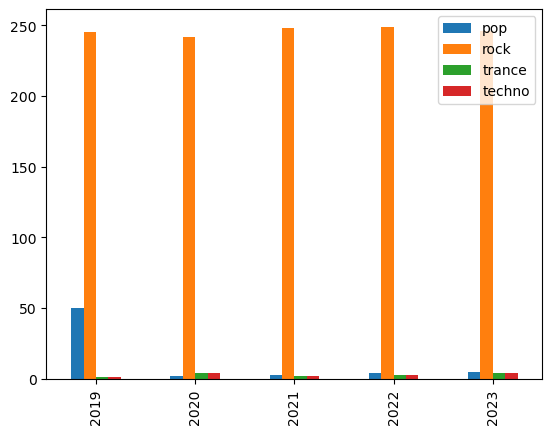

In [56]:
datos333.plot.bar()